Sodelujoči

    Tomaž Štrus
    Anže Košir
    Jan Harej

O projektu: Iz platforme Steam, namenjenu predvsem za distrubicijo video iger, bomo zbrali podatke igrah več ljudi, ter analizirali stvari kot so npr. koliko iger, ki jih kupijo dejansko preigrajo, kolika časa bo nekdo zapravil za neko igro, kakšno igro bo kupil naslednjo, glede na svoje igre ipd.

Podatki: Uporabili bomo API, ki ga ponuja Steam: https://developer.valvesoftware.com/wiki/Steam_Web_API#JSON Tu lahko dobimo podatko o čisto vsemu kar potrebujemo npr. o uporabniku, njegove igre, prijatelji, koliko ur je igral neko igro, ... Dobili bomo podatke za npr. 100.000+ uporabnikov (prijatelji naših prijateljev, in njihov prijateljev itd.)

## Vprašanja za raziskavo
1. Povprečno dokončanje igre
2. Število in vrsta Bannov v povezavi z javnimi/privatnimi profili
3. Najmanjkrat odklenjeni dosežki za igrane igre
4. Število prijateljev glede na "starost" računa

In [1]:
from scripts.imports import *
from scripts.data_variables import *
from scripts.gameStats_functions import *

In [2]:
from scripts.get_read_write import *

In [3]:
player_ids, player_summaries, player_friends, player_games, player_achievements, player_bans = read_all_from_file()
#player_ids = read_player_ids()
print("Current database size: {} users".format(len(player_ids)))
#player_summaries = read_player_summaries()
#player_friends = read_player_friends()
#player_games = read_player_games()
#player_bans = read_player_bans()

INFO: reading ids
INFO: reading ids finished
INFO: reading summaries
INFO: reading summaries finished
INFO: reading friends
INFO: reading friends finished
INFO: reading games
INFO: reading games finished
INFO: reading achievements
INFO: reading achievements finished
INFO: reading bans
INFO: reading bans finished
Current database size: 100 users


# Odgovori na vprašanja

Najbolj igrane igre

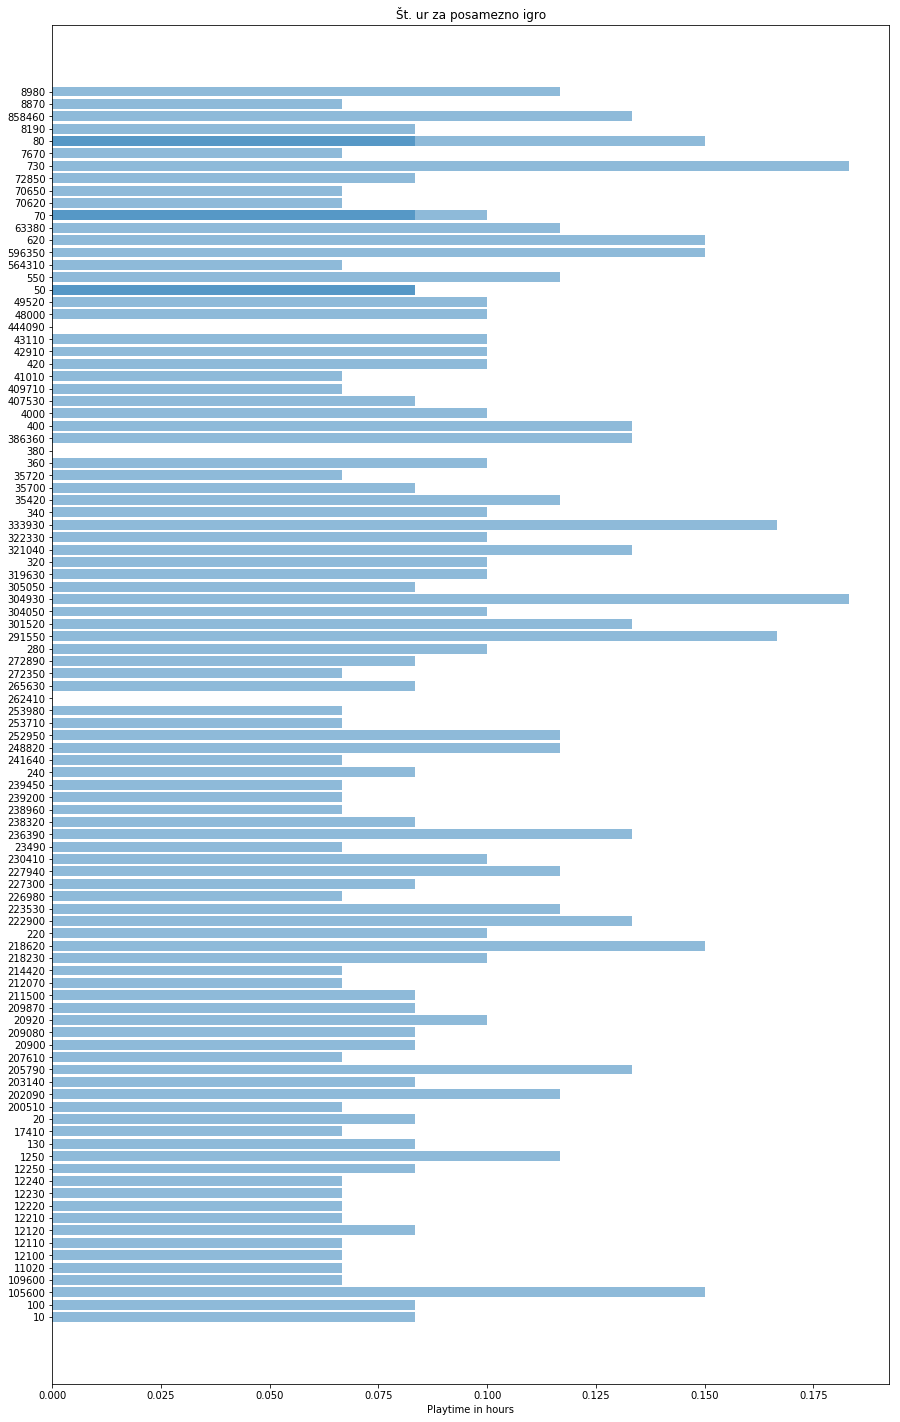

In [8]:
( TopBought,Top100sortedTotalPlaytime)= getMostCommonGamesAndHighestPlaytimeSorted(player_games)
plotTopBoughtGames(TopBought[0:100])

### 1. Povprečno dokončanje igre

### 2. Število in vrsta Bannov v povezavi z javnimi/privatnimi profili

### 3. Najmanjkrat odklenjeni dosežki za igrane igre

### 4. Število prijateljev glede na "starost" računa

### 5. Odvisnost med težavnostjo igre in njenim uspehom